<a href="https://colab.research.google.com/github/Ais2004/Drowsiness/blob/main/Driver_drowsiness2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch==2.0.1+cu118 torchvision==0.15.2+cu118 torchaudio==2.0.2 --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 410.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 83.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lit: filename=lit-15.0.7-py3-none-any.whl size=89990 sha256=e58c35a7f377d0a8791daf0f6e0f7e02cc1c99a64a9dcddc09becf96650f3d8f
  Stored in directory: /root/.cache/pip/wheels/fc/5d/45/34fe9945d5e45e261134e72284395be36c2d4828af38e2b0fe
Successfully built lit
  Attempting uninstall: triton
    Found existing installation: triton 3.2.0
    Uninstalling triton-3.2.0:
      Successfully uninstalled triton-3.2.0
  Attempting uninstall: torch
    Found existing installation: torch 2.

In [2]:
!rm -rf yolov5
!git clone https://github.com/ultralytics/yolov5


Cloning into 'yolov5'...
remote: Enumerating objects: 17372, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 17372 (delta 44), reused 24 (delta 22), pack-reused 17308 (from 2)
Receiving objects: 100% (17372/17372), 16.24 MiB | 13.95 MiB/s, done.
Resolving deltas: 100% (11906/11906), done.


In [3]:
!pip install -r /content/yolov5/requirements.txt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 23.5 MB/s eta 0:00:00


In [4]:

# Remove broken numpy and scipy versions
!pip uninstall -y numpy scipy
!pip install numpy==1.26.4 scipy==1.11.4 --force-reinstall



Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: scipy 1.14.1
Uninstalling scipy-1.14.1:
  Successfully uninstalled scipy-1.14.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 19.9 MB/s eta 0:00:00


In [2]:
import cv2
import numpy as np
import torch
import time
from scipy.spatial import distance as dist
from IPython.display import display, clear_output
from matplotlib import pyplot as plt

model = torch.hub.load('ultralytics/yolov5', 'yolov5s')


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-4-9 Python-3.11.11 torch-2.0.1+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
def eye_aspect_ratio(eye):
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])
    C = dist.euclidean(eye[0], eye[3])
    ear = (A + B) / (2.0 * C)
    return ear


In [4]:
from google.colab import files
uploaded = files.upload()

Saving download (3).jpg to download (3).jpg


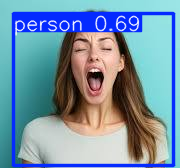

In [11]:
import PIL.Image
from IPython.display import display

# Get the uploaded image path
image_path = list(uploaded.keys())[0]

# Run detection
results = model(image_path)
results.render()

# Show the image with bounding boxes
img_with_boxes = PIL.Image.fromarray(results.ims[0])
display(img_with_boxes)


In [12]:
# 🖼️ Read and display the uploaded image
import cv2
from matplotlib import pyplot as plt

# Check uploaded
print("Uploaded:", uploaded)

# Get the uploaded file name
image_path = list(uploaded.keys())[0]

# Read the image using OpenCV
img = cv2.imread(image_path)
if img is None:
    print("❌ Failed to load image. Check filename or try re-uploading.")
else:
    # Convert BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.figure(figsize=(6,6))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title("Uploaded Image")
    plt.show()


Uploaded: {'download (3).jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x08\x07\x06\t\x08\x07\x08\n\n\t\x0b\r\x16\x0f\r\x0c\x0c\r\x1b\x14\x15\x10\x16 \x1d"" \x1d\x1f\x1f$(4,$&1\'\x1f\x1f-=-157:::#+?D?8C49:7\x01\n\n\n\r\x0c\r\x1a\x0f\x0f\x1a7%\x1f%77777777777777777777777777777777777777777777777777\xff\xc0\x00\x11\x08\x00\xa8\x00\xb4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x00\x07\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\xff\xc4\x00?\x10\x00\x01\x03\x02\x03\x04\x07\x06\x04\x05\x02\x07\x00\x00\x00\x00\x01\x00\x02\x03\x04\x11\x05\x12!\x06\x131a"AQq\x81\x91\xb1\x14#2\xa1\xc1\xf0\x073R\xd1$BCb\xe1r\xf1\x15\x16&5Ss\x82\xff\xc4\x00\x1a\x01\x00\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\xff\xc4\x00%\x11\x00\x02\x02\x02\x02\x02\x02\x02\x03\x01\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x11!\x041\x12A\x05"\x13Qaq\x813\xff\xda\x00

In [13]:
!pip install mediapipe


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 22.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.6 which is incompatible.


In [14]:
import mediapipe as mp
import numpy as np

# Eye landmarks index (Mediapipe FaceMesh)
LEFT_EYE = [33, 160, 158, 133, 153, 144]
RIGHT_EYE = [362, 385, 387, 263, 373, 380]

# Calculate EAR
def calculate_ear(eye_landmarks):
    # Vertical distances
    A = np.linalg.norm(eye_landmarks[1] - eye_landmarks[5])
    B = np.linalg.norm(eye_landmarks[2] - eye_landmarks[4])
    # Horizontal distance
    C = np.linalg.norm(eye_landmarks[0] - eye_landmarks[3])
    ear = (A + B) / (2.0 * C)
    return ear


In [15]:
mp_face_mesh = mp.solutions.face_mesh

# Load and process image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Detect facial landmarks
with mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1) as face_mesh:
    results = face_mesh.process(image_rgb)

    if results.multi_face_landmarks:
        face_landmarks = results.multi_face_landmarks[0]
        h, w, _ = image.shape

        left_eye = []
        right_eye = []

        for idx in LEFT_EYE:
            x = int(face_landmarks.landmark[idx].x * w)
            y = int(face_landmarks.landmark[idx].y * h)
            left_eye.append(np.array([x, y]))

        for idx in RIGHT_EYE:
            x = int(face_landmarks.landmark[idx].x * w)
            y = int(face_landmarks.landmark[idx].y * h)
            right_eye.append(np.array([x, y]))

        left_ear = calculate_ear(np.array(left_eye))
        right_ear = calculate_ear(np.array(right_eye))
        avg_ear = (left_ear + right_ear) / 2.0

        # Threshold for drowsiness
        EAR_THRESHOLD = 0.25

        if avg_ear < EAR_THRESHOLD:
            print("😴 Drowsy: Eyes are closed")
        else:
            print("🙂 Alert: Eyes are open")
    else:
        print("No face detected.")


😴 Drowsy: Eyes are closed


In [16]:
# Inner lip landmarks from Mediapipe FaceMesh
MOUTH_LANDMARKS = [13, 14, 78, 308, 82, 312]  # [top, bottom, left, right, upper-left, upper-right]


In [17]:
def calculate_mar(landmarks):
    # Vertical: top (13) to bottom (14)
    A = np.linalg.norm(landmarks[0] - landmarks[1])
    # Horizontal: left (78) to right (308)
    B = np.linalg.norm(landmarks[2] - landmarks[3])
    mar = A / B
    return mar


In [18]:
        # Get mouth landmarks
        mouth = []
        for idx in MOUTH_LANDMARKS:
            x = int(face_landmarks.landmark[idx].x * w)
            y = int(face_landmarks.landmark[idx].y * h)
            mouth.append(np.array([x, y]))

        mar = calculate_mar(mouth)

        # Threshold for yawn
        MAR_THRESHOLD = 0.6

        # Final analysis
        if avg_ear < EAR_THRESHOLD and mar > MAR_THRESHOLD:
            print("😴 Drowsy: Eyes closed + Yawning detected")
        elif avg_ear < EAR_THRESHOLD:
            print("😐 Warning: Eyes closed")
        elif mar > MAR_THRESHOLD:
            print("😮 Yawning detected")
        else:
            print("🙂 Alert: Eyes open and no yawning")


😴 Drowsy: Eyes closed + Yawning detected


In [19]:
# Define 3D model points of face landmarks (nose, eyes, chin)
model_points = np.array([
    (0.0, 0.0, 0.0),             # Nose tip
    (0.0, -330.0, -65.0),        # Chin
    (-225.0, 170.0, -135.0),     # Left eye left corner
    (225.0, 170.0, -135.0),      # Right eye right corner
    (-150.0, -150.0, -125.0),    # Left mouth corner
    (150.0, -150.0, -125.0)      # Right mouth corner
], dtype=np.float64)

# Get 2D points from face landmarks
image_points = np.array([
    (face_landmarks.landmark[1].x * w, face_landmarks.landmark[1].y * h),   # Nose tip
    (face_landmarks.landmark[152].x * w, face_landmarks.landmark[152].y * h), # Chin
    (face_landmarks.landmark[33].x * w, face_landmarks.landmark[33].y * h),   # Left eye
    (face_landmarks.landmark[263].x * w, face_landmarks.landmark[263].y * h), # Right eye
    (face_landmarks.landmark[61].x * w, face_landmarks.landmark[61].y * h),   # Left mouth
    (face_landmarks.landmark[291].x * w, face_landmarks.landmark[291].y * h), # Right mouth
], dtype=np.float64)

# Camera matrix and distortion
focal_length = w
center = (w / 2, h / 2)
camera_matrix = np.array([
    [focal_length, 0, center[0]],
    [0, focal_length, center[1]],
    [0, 0, 1]
], dtype="double")

dist_coeffs = np.zeros((4, 1))  # Assume no lens distortion

# Solve for head pose
_, rotation_vector, translation_vector = cv2.solvePnP(
    model_points, image_points, camera_matrix, dist_coeffs)

# Get angles
rmat, _ = cv2.Rodrigues(rotation_vector)
angles, _, _, _, _, _ = cv2.RQDecomp3x3(rmat)

pitch, yaw, roll = angles

if abs(pitch) > 15:
    print("⚠️ Head tilted down - possible drowsiness")
elif abs(yaw) > 20:
    print("👀 Looking away")


⚠️ Head tilted down - possible drowsiness
